In [6]:
#Importing necessery packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#Loading dataset.
df = pd.read_csv("salaries.csv")

<CENTER> <H1>Exploratory Data Analysis</H1><CENTER>

In [7]:
#Printing the first 5 rows of the dataset.
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


In [8]:
#Printing the last 5 rows of the dataset.
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16489,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16490,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16491,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16492,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
16493,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [9]:
#Printing the information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [10]:
df.shape

(16494, 11)

In [11]:
df.describe(exclude='object')

,work_year,salary,salary_in_usd,remote_ratio
count,16494.000000,1.649400e+04,16494.000000,16494.000000
mean,2023.224991,1.637878e+05,149713.575725,32.044986
std,0.713405,3.406017e+05,68516.136918,46.260201
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.020000e+05,101517.500000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.873422e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [12]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,16494,16494,16494,16494,16494,16494,16494
unique,4,4,155,23,88,77,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,10652,16414,3456,15254,14427,14478,15268


<center><u><h1>Insight from the descriptive statistic</h1></u></center>
<ul>
<li> By analysing from this descriptive statistic values, we came to know that the dataset have the salaries of the enggineers from 2020 to 2023.</li>
<li> The dataset has the details of the salary of personnals who is recieving the salary from a range of 15000USD to 80000USD as well. Also it has a mean salary of 149713USD. </li>
</ul>

In [15]:
#Checking for the null values.
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<center><u><h1>Graphical Representation</h1></u></center>

In [17]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [28]:
df['employee_residence'].value_counts()

employee_residence
US    14427
GB      686
CA      453
ES      137
DE       98
      ...  
UG        1
MU        1
QA        1
PE        1
LU        1
Name: count, Length: 88, dtype: int64

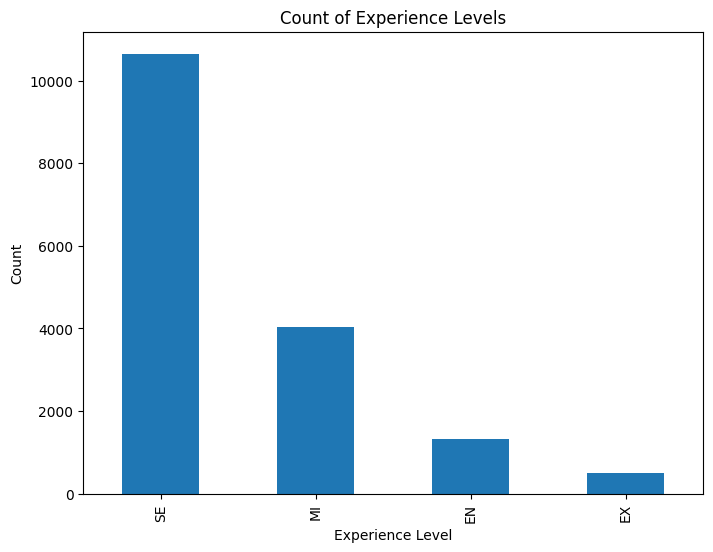

In [29]:
# Count of experience levels
experience_counts = df['experience_level'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
experience_counts.plot(kind='bar')
plt.title('Count of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()


##### <b>Interpretation:<b> 

The Senior Level Experience have got the count more that the rest, Experienced professionals with significant expertise and often many years of experience in their field. They typically take on leadership roles and have a deep understanding of their industry.

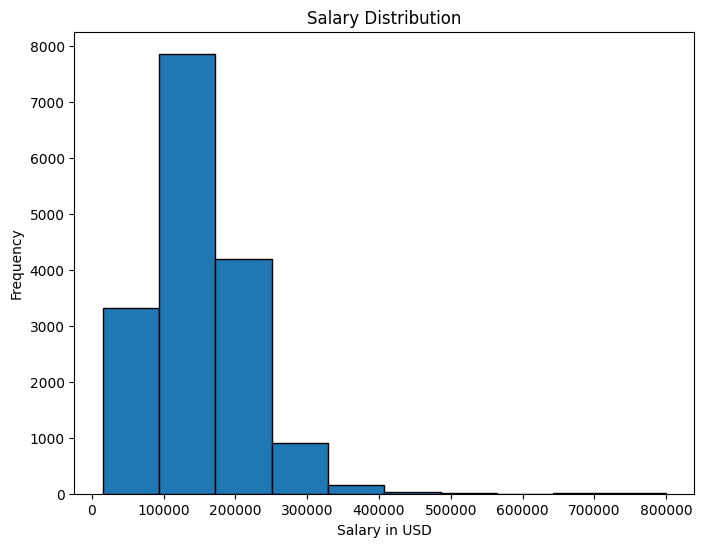

In [30]:
# Histogram for salary distribution
plt.figure(figsize=(8, 6))
plt.hist(df['salary_in_usd'], bins=10, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


##### <b>Interpretation<b>:

The salary distribution have got the highest range to be 150000 dollors.

<Figure size 800x600 with 0 Axes>

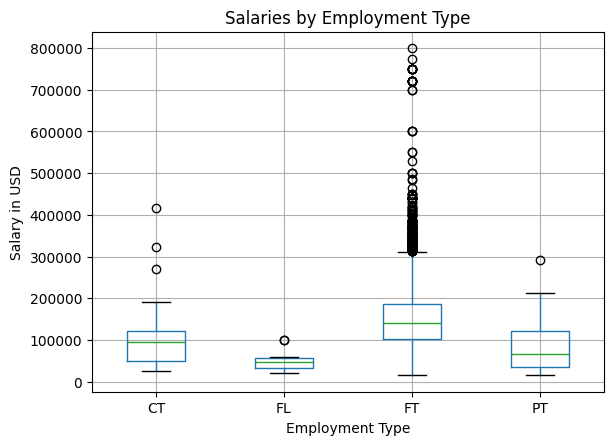

In [31]:
# Box plot for salaries by employment type
plt.figure(figsize=(8, 6))
df.boxplot(column='salary_in_usd', by='employment_type')
plt.title('Salaries by Employment Type')
plt.suptitle('')  # Suppress the default title to keep the plot clean
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()


##### <b>Interpretation:<b> 

In comparison to freelancing (FL) and part-time (PT) roles, which have median earnings of roughly $50,000, full-time (FT) and contract (CT) positions offer higher median salaries of approximately $100,000, with greater variability. This is evident from the box plot of salaries by employment type. There are a lot of outliers in full-time employment as well; some incomes can reach up to $800,000, meaning that some workers make a lot more money than average. Similar fluctuations can be seen in contract roles, where compensation might reach $400,000. While certain earnings in freelance and part-time work can approach $100,000 and $200,000, respectively, these roles are less variable and do not have as many high-paying outliers. All things considered, full-time and contract positions typically pay more and vary more.



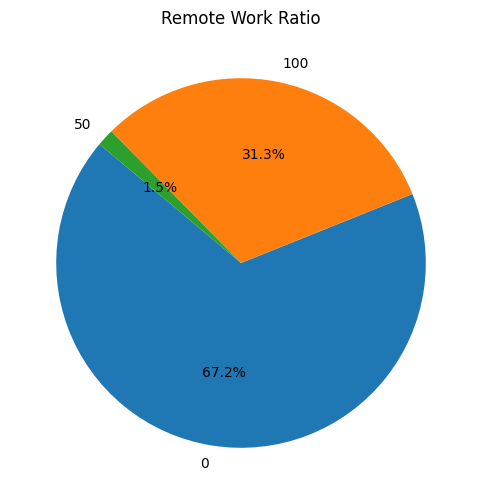

In [33]:
# Pie chart for remote work ratio
remote_counts = df['remote_ratio'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Remote Work Ratio')
plt.show()

### <b>Interpretation:<b> 

A large majority of employment (67.2%) require employees to be totally on-site, according to the remote work ratio pie chart, demonstrating that many functions still require physical presence at the office. In the meantime, 31.3% of the jobs are entirely remote, indicating a significant shift in favor of remote work that may have been prompted by changes in workplace dynamics brought on by the COVID-19 pandemic as well as technological breakthroughs. A mere 1.5% of jobs allow employees to work a combination of on-site and remote hours. This is a very modest percentage. This shows that although some businesses are looking at flexible work schedules, hybrid roles are not as popular as totally remote or fully on-site positions at this time. 

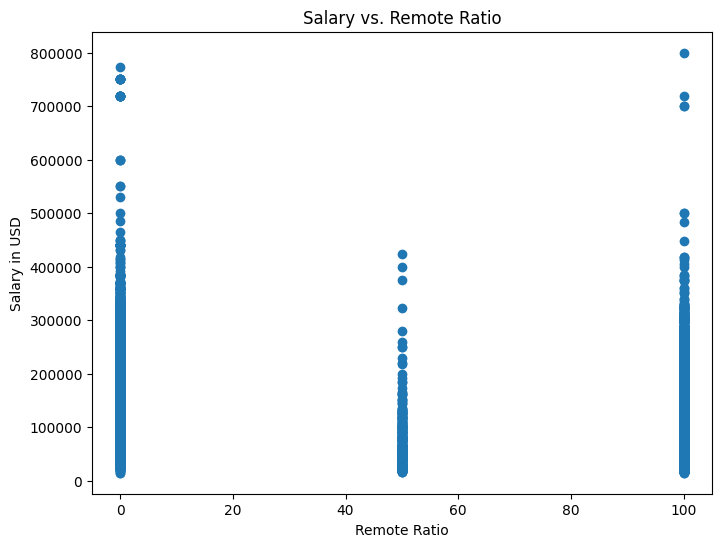

In [35]:
# Scatter plot for salary vs. remote ratio
plt.figure(figsize=(8, 6))
plt.scatter(df['remote_ratio'], df['salary_in_usd'])
plt.title('Salary vs. Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()


### <b>Interpretation:<b> 

The distribution with work from home which is nothing but the "No remote work (0%)" have got more values. Compared with the Partially Remote and the Fully Remote. The scatterness is more to be more in completely remote or not the remote.

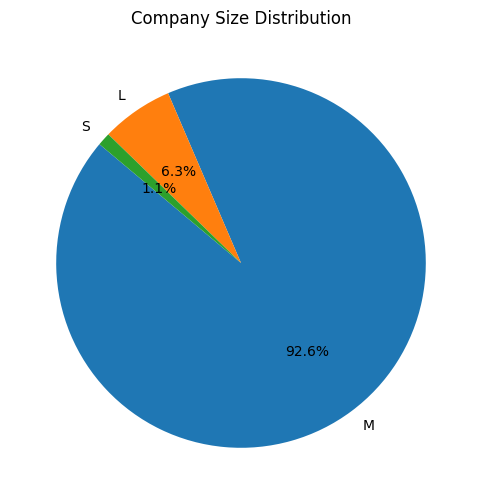

In [36]:
# Pie chart for company size distribution
size_counts = df['company_size'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Company Size Distribution')
plt.show()


### <b>Interpretation:<b> 

The distribution of the company size is more for Medium compared with the Large and Small, here we can interpret that, It alludes to a sensible harmony between suppleness and stability. In addition to providing a predictable work environment and financial security, medium-sized businesses are frequently flexible enough to quickly innovate and adapt. In addition to having many options for skill development and professional advancement, employees in these organizations frequently take on a variety of roles and acquire a wide range of experiences. Medium-sized businesses typically provide a more individualized and welcoming work environment that promotes a feeling of community and belonging. These businesses also frequently acknowledge individual accomplishments, which raises motivation and job satisfaction.


### Modelling

In [7]:
label_encoders = {}
for column in ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df.drop('company_size', axis=1)
y = df['company_size']

# Encode target variable
y = LabelEncoder().fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.96


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       224
           1       0.97      0.99      0.98      3036
           2       0.35      0.15      0.21        39

    accuracy                           0.96      3299
   macro avg       0.69      0.60      0.63      3299
weighted avg       0.95      0.96      0.95      3299



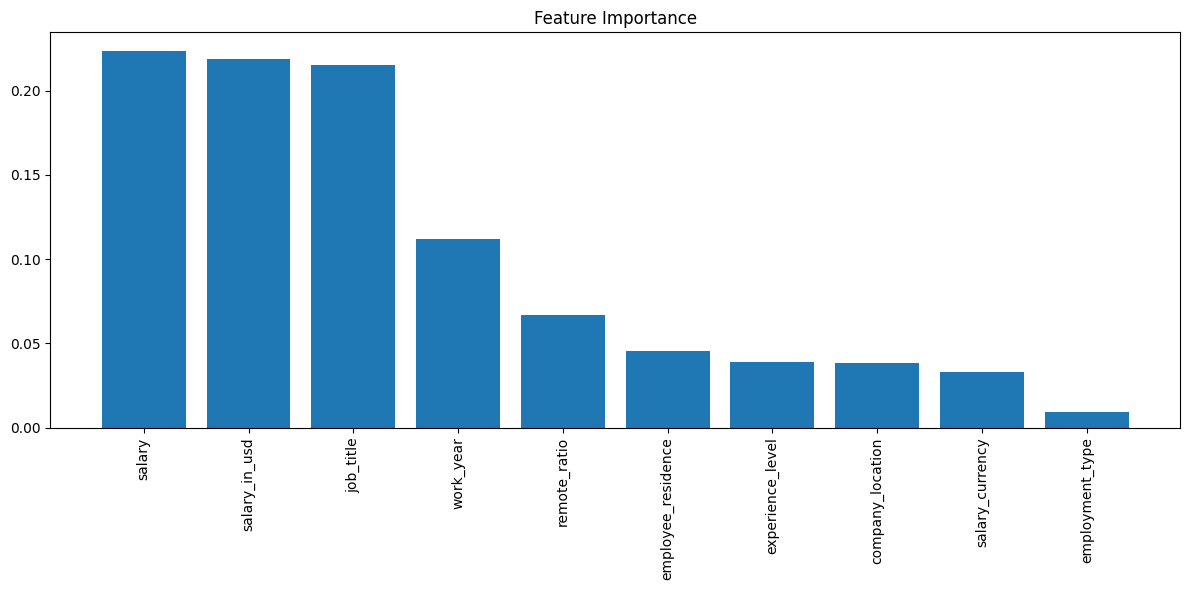

In [8]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

#### Interpretation:

The fact that wage has a greater feature relevance when it comes to forecasting the size of the company indicates that compensation is crucial to the dynamics of medium-sized businesses. This suggests that competitive compensation are a top priority for medium-sized businesses, which are frequently financially stable and seek to recruit and retain talented employees. These businesses most likely make large investments in human capital because they see their workforce as priceless resources that are vital to their expansion and prosperity. In addition to promoting a healthy work environment, market competitiveness, and the company's overall stance within the sector, the emphasis on wage highlights a strategic approach to talent acquisition and retention.



In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded in `df`

# Encode categorical variables
label_encoders = {}
for column in ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df.drop('company_size', axis=1)
y = df['company_size']

# Encode target variable
y = LabelEncoder().fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define PCA, Random Forest, and Grid Search parameters
pca = PCA()
rf = RandomForestClassifier(random_state=42)
pipe = Pipeline(steps=[('pca', pca), ('rf', rf)])

# Define parameter grid for Grid Search
param_grid = {
    'pca__n_components': [2, 3, 4, 5],  # Number of PCA components
    'rf__n_estimators': [50, 100, 150],  # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 30]  # Maximum depth of the trees
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:")
print(best_params)

# Make predictions using the best estimator
y_pred_grid = best_estimator.predict(X_test)

# Evaluate the model with Grid Search
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f'Accuracy with Grid Search: {accuracy_grid:.2f}')

print('Classification Report with Grid Search:')
print(classification_report(y_test, y_pred_grid))



Best Parameters:
{'pca__n_components': 3, 'rf__max_depth': 20, 'rf__n_estimators': 100}
Accuracy with Grid Search: 0.95
Classification Report with Grid Search:
              precision    recall  f1-score   support

           0       0.77      0.60      0.68       224
           1       0.96      0.99      0.98      3036
           2       0.18      0.05      0.08        39

    accuracy                           0.95      3299
   macro avg       0.64      0.55      0.58      3299
weighted avg       0.94      0.95      0.94      3299



#### INTERPRETATION


If the accuracy dropped by 1% after using Grid Search compared to the default hyperparameters of the RandomForestClassifier, a possible explanation could be overfitting. Grid Search might have selected hyperparameters that overly generalize the model, sacrificing some accuracy on the test set to reduce overfitting. This trade-off between bias and variance is common in machine learning, where more complex models can fit the training data better but may struggle to generalize to unseen data. Adjusting the hyperparameters or exploring regularization techniques could help strike a better balance between model complexity and generalization.